[656 658 552 443 435 384 398 354 384]


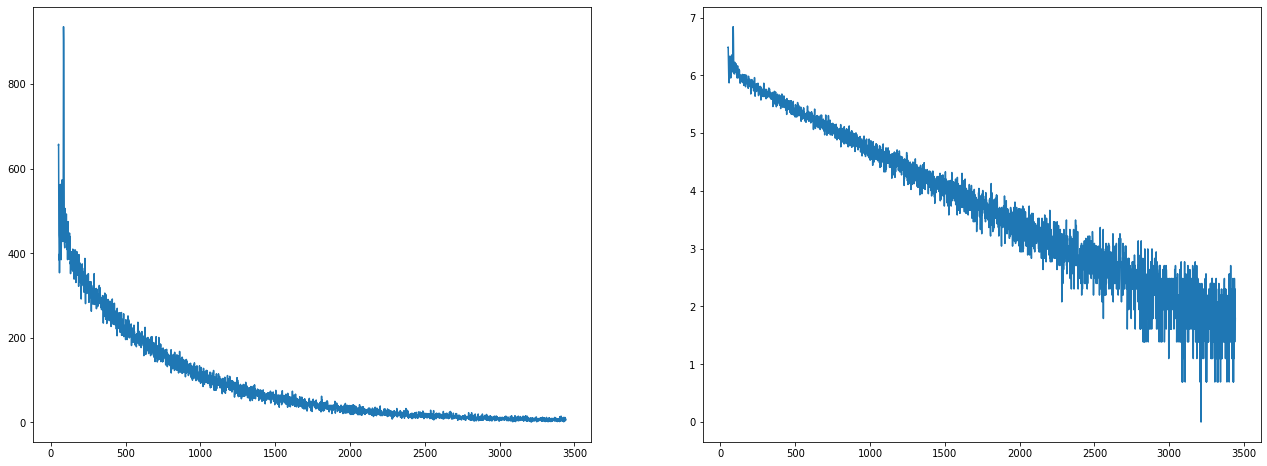

(3392,)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        data[i] += int(f.readline())

    f.close()

addData("0227_Data.Spe")
addData("0306_Data.Spe")
addData("0308_Data.Spe")
addData("0315_Data.Spe")
addData("0403_Data.Spe")


left_chop = 51
right_chop = np.where(data[left_chop:] == 0)[0][0]

bins = np.arange(0, 16384, 1)

bins_chopped = bins[left_chop:right_chop]
data_chopped = data[left_chop:right_chop]

log_data_chopped = np.log(data_chopped)

print(data[left_chop:60])

fig, axes = plt.subplots(1, 2, figsize = (22, 8))

axes[0].plot(bins_chopped, data_chopped)
axes[1].plot(bins_chopped, log_data_chopped)
plt.show()

print(data_chopped.shape)


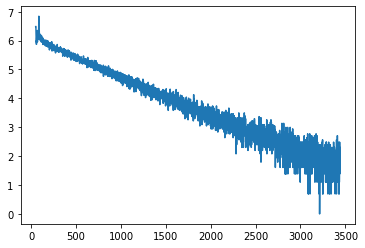

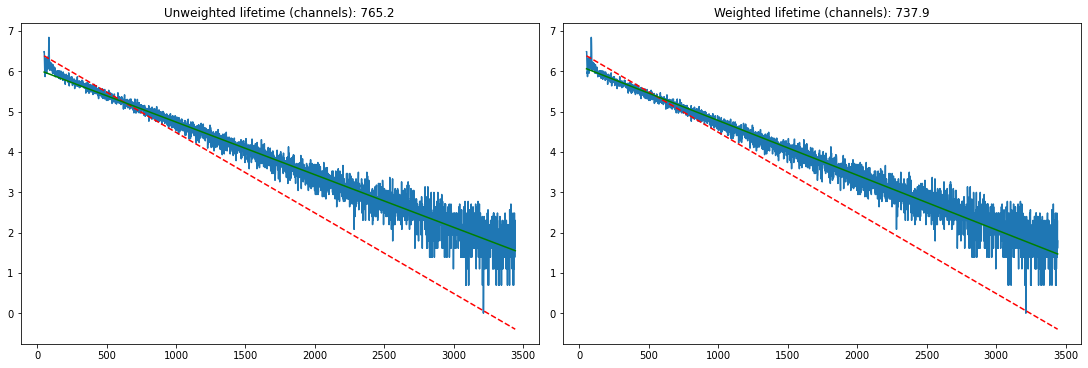

Fitted lifetime (channels): 737.9


In [23]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
ax.plot(bins_chopped,log_data_chopped)
plt.show()
#chopRight = 5000
p0 = (log_data_chopped[0], -1/500)
def func_lin(t,p0, p1):
    return p0+p1*t

fig, axs = plt.subplots(1,2, figsize = (15,5),constrained_layout = True)
axs[0].set_title("Unweighted")
axs[0].plot(bins_chopped,log_data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0)
axs[0].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[0].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Unweighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[0].set_title(title)

axs[1].plot(bins_chopped,log_data_chopped)

sigmas = 1/np.sqrt(data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0, sigma = sigmas)
axs[1].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[1].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Weighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[1].set_title(title)
plt.show()
print("Fitted lifetime (channels): {:5.1f}".format(-1/popt[1]))